In [28]:
from montecarlo import *

# SCENARIO 1

1. Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.

In [49]:
fair = Die(['H','T'])
unfair = Die(['H','T'])
unfair.change_weight('H',5)

print(fair.showCurrent())
print(unfair.showCurrent())

  faces  weights
0     H      1.0
1     T      1.0
  faces  weights
0     H      5.0
1     T      1.0


2. Play a game of 1000 flips of three coins with all fair dice.

In [45]:
nroll = 1000
game2 = Game([fair, fair, fair])
game2.play(nroll)
game2.show()

,0,1,2
rollNumber,,,
1,T,H,H
2,H,H,T
3,T,T,T
4,T,H,H
5,T,T,H
...,...,...,...
996,H,H,T
997,T,H,H
998,H,T,T


3. Play a game of 1000 flips with two unfair dice and one fair die.

In [46]:
game3 = Game([unfair, unfair, fair])
game3.play(nroll)
game3.show()

,0,1,2
rollNumber,,,
1,H,H,T
2,H,H,H
3,H,H,H
4,H,H,T
5,T,T,T
...,...,...,...
996,H,H,H
997,H,H,T
998,H,H,T


4. For each game, use an Analyzer object to determine the relative frequency of jackpots - getting either all Hs or all Ts.

In [32]:
analyzer2 = Analyzer(game2)
jack2 = analyzer2.jackpot()

analyzer3 = Analyzer(game3)
jack3 = analyzer3.jackpot()

5. Compute relative frequency as the number of jackpots over the total number of rolls.

In [48]:
game2frequencies = jack2/nroll
game3frequencies = jack3/nroll
print(game2frequencies)
print(game3frequencies)

0.005
0.01


6. Show your results, comparing the two relative frequencies, in a simple bar chart.

<function matplotlib.pyplot.show(close=None, block=None)>

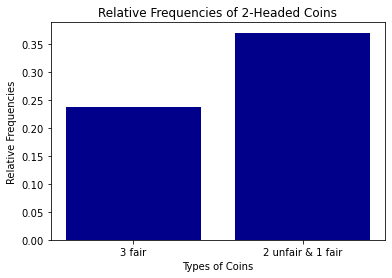

In [34]:
data = {'3 fair':game2frequencies, '2 unfair & 1 fair':game3frequencies}
games = list(data.keys())
values = list(data.values())
plt.bar(games, values, color = "darkblue")
plt.xlabel("Types of Coins")
plt.ylabel("Relative Frequencies")
plt.title("Relative Frequencies of 2-Headed Coins")
plt.show

# SCENARIO 2

1. Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will  weight 1 five times more than the others.

In [52]:
fair = Die([1,2,3,4,5,6])
unfair1 = Die([1,2,3,4,5,6])
unfair2 = Die([1,2,3,4,5,6])
unfair1.change_weight(6,5)
unfair2.change_weight(1,5)

print(fair.showCurrent())
print(unfair1.showCurrent())
print(unfair2.showCurrent())

   faces  weights
0      1      1.0
1      2      1.0
2      3      1.0
3      4      1.0
4      5      1.0
5      6      1.0
   faces  weights
0      1      1.0
1      2      1.0
2      3      1.0
3      4      1.0
4      5      1.0
5      6      5.0
   faces  weights
0      1      5.0
1      2      1.0
2      3      1.0
3      4      1.0
4      5      1.0
5      6      1.0


2. Play a game of 10000 rolls with 5 fair dice.

In [53]:
nroll = 10000
game2 = Game([fair, fair, fair, fair, fair])
game2.play(nroll)
game2.show()


,0,1,2,3,4
rollNumber,,,,,
1,2,2,4,1,3
2,5,2,4,3,6
3,4,5,5,1,3
4,3,1,5,3,2
5,5,5,3,5,2
...,...,...,...,...,...
9996,5,6,2,6,3
9997,6,5,4,6,3
9998,2,4,1,4,6


3. Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.

In [54]:
game3 = Game([unfair1, unfair1, unfair2, fair, fair])
game3.play(nroll)
game3.show()

,0,1,2,3,4
rollNumber,,,,,
1,6,6,1,6,3
2,4,2,6,5,2
3,4,6,1,4,2
4,1,1,6,1,6
5,1,6,1,4,1
...,...,...,...,...,...
9996,6,1,1,2,2
9997,6,6,1,6,1
9998,6,6,1,5,6


4. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

<function matplotlib.pyplot.show(close=None, block=None)>

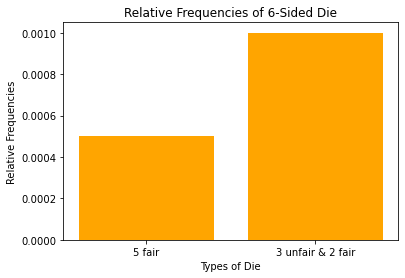

In [38]:
analyzer2 = Analyzer(game2)
jack2 = analyzer2.jackpot()
analyzer3 = Analyzer(game3)
jack3 = analyzer3.jackpot()

data = {'5 fair':jack2/nroll, '3 unfair & 2 fair':jack3/nroll}
games = list(data.keys())
values = list(data.values())
plt.bar(games, values, color="orange")
plt.xlabel("Types of Die")
plt.ylabel("Relative Frequencies")
plt.title("Relative Frequencies of 6-Sided Die")
plt.show

5. Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

<function matplotlib.pyplot.show(close=None, block=None)>

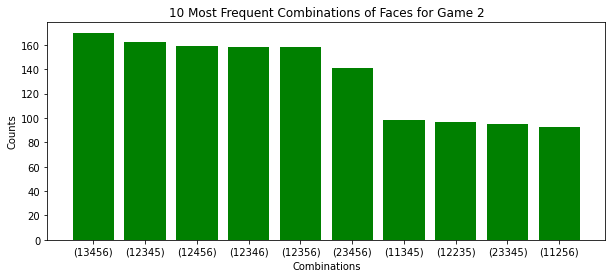

In [39]:
analyzer2.combo()
a2 = analyzer2.comboDF
a2 = a2[:10]
indices = pd.DataFrame(a2.index)
stringlist = []
for i in range(10):
    stringlist.append((str(indices[0][i])).replace(', ', ''))
a2['stringlist']=stringlist

plt.figure(figsize=(10, 4))
plt.bar(list(a2['stringlist'].values), list(a2['frequencies'].values), color="green")
plt.xlabel("Combinations")
plt.ylabel("Counts")
plt.title("10 Most Frequent Combinations of Faces for Game 2")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

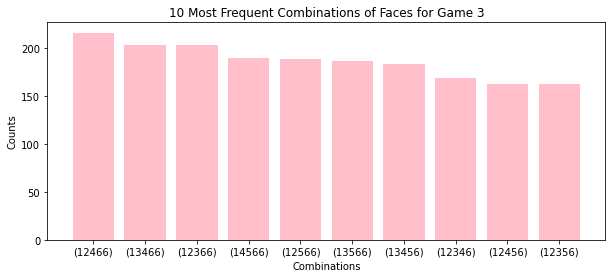

In [40]:
analyzer3.combo()
a3 = analyzer3.comboDF
a3 = a3[:10]
indices = pd.DataFrame(a3.index)
stringlist = []
for i in range(10):
    stringlist.append((str(indices[0][i])).replace(', ', ''))
a3['stringlist']=stringlist

plt.figure(figsize=(10, 4))
plt.bar(list(a3['stringlist'].values), list(a3['frequencies'].values), color="pink")
plt.xlabel("Combinations")
plt.ylabel("Counts")
plt.title("10 Most Frequent Combinations of Faces for Game 3")
plt.show

# SCENARIO 3

1. Create a "die" of letters from a to z with weights based on their frequency of usage.

In [42]:
letters_dict = {'A': 8.4966, 'B': 2.0720, 'C': 4.5388, 'D ': 3.3844, 'E': 11.1607,
'F': 1.8121, 'G': 4.4705, 'H': 3.0034, 'I': 7.5448, 'J': 0.1965,
'K': 1.1016, 'L': 5.4893, 'M': 3.0129, 'N': 6.6544, 'O': 7.1635, 
'P': 3.1671, 'Q': 0.1962, 'R': 7.5809, 'S': 5.7351, 'T': 6.9509,
'U': 3.6308, 'V': 1.0074, 'W': 1.2899, 'X': 0.2902, 'Y': 1.7779, 'Z': 0.2722}

d3 = Die(list(letters_dict.keys()))
for each in list(letters_dict.keys()):
    d3.change_weight(each,letters_dict.get(each))

d3.showCurrent()


,faces,weights
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607
5,F,1.8121
6,G,4.4705
7,H,3.0034
8,I,7.5448
9,J,0.1965


2. Play a game involving 5 of these dice with 1000 rolls.

In [43]:
gametwo = Game([d3, d3, d3, d3, d3])
gametwo.play(1000)
gametwo.show()

,0,1,2,3,4
rollNumber,,,,,
1,E,U,H,G,L
2,I,G,E,L,S
3,L,O,A,A,M
4,N,C,D,A,F
5,G,Y,O,O,R
...,...,...,...,...,...
996,I,N,T,E,N
997,G,O,R,I,S
998,B,U,P,I,R


3. How many combos can you that look like actual English words?

In [25]:
datafr = gametwo.show()
datafr['potentialWords'] = datafr[0] + datafr[1] + datafr[2] + datafr[3] + datafr[4]

dict = enchant.Dict("en_US")
english_words = []
for i in datafr['potentialWords']:
    if dict.check(i)==True:
        english_words.append(i)
english_words

['UNSET', 'SPREE', 'FARSI']

4. Based on your eye count, what is the relative frequency of these words versus the rest?

In [27]:
len(english_words) / len(datafr)


0.003